#BERT on lyrics

In [21]:
!pip install demoji
!pip install tdqm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
from tqdm import *
import tqdm
import demoji
from transformers import pipeline 
from transformers import BertTokenizer
from transformers import BertModel
from transformers import BertForSequenceClassification
import pandas as pd

In [25]:
import re

In [26]:
import nltk

nltk.download("vader_lexicon")

from nltk.sentiment.vader import SentimentIntensityAnalyzer

vader_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [27]:
df2=pd.read_csv("/content/drive/MyDrive/siqi mock/csv files/finaldata_all_lyrics.csv", encoding='utf-8')

In [28]:
lyrics = df2['lyrics'].values.tolist()

In [29]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased') 
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer) 

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [30]:
negaposi_score = []
nega_count = []
posi_count = []

for l in tqdm.tqdm(lyrics):
    l = demoji.replace(string=l, repl='')
    l_list = re.findall('[A-Z][^A-Z]*', l)

    l_count = len(l_list)

    t_score = 0
    t_nega = 0
    t_posi = 0

    for t in l_list:
        if len(t) > 500:
            t = t[:500]

        emotion = nlp(t)
        negaposi = emotion[0]['label']
        score = emotion[0]['score']
        if negaposi == 'LABEL_0':
            t_score -= score
            t_nega += 1
        else:
            t_score += score
            t_posi += 1

    t_score = t_score / l_count
    negaposi_score.append(t_score)

    nega_count.append(t_nega)
    posi_count.append(t_posi)

df2['bert_nega'] = nega_count
df2['bert_posi'] = posi_count
df2['bert_score'] = negaposi_score

100%|██████████| 246/246 [10:17<00:00,  2.51s/it]


In [31]:
df2

,artist,song,lyrics,bert_nega,bert_posi,bert_score
0,Miley Cyrus,Flowers,"We were good, we were gold Kind of dream that ...",13,9,-0.144740
1,SZA,Kill Bill,I'm still a fan even though I was salty Hate t...,15,7,-0.207048
2,"Metro Boomin, The Weeknd, 21 Savage",Creepin' (with The Weeknd & 21 Savage),Oooh Just can't believe this man (Metro Boomin...,17,7,-0.239239
3,"Metro Boomin, Future, Chris Brown",Superhero (Heroes & Villains) [with Future & C...,"(Metro, metro, metro, metro) Drankin' dope tur...",28,5,-0.427365
4,"Drake, 21 Savage",Rich Flex,"Go buy a zip of weed, hit the club Pay for 'bo...",18,10,-0.190593
...,...,...,...,...,...,...
241,"Grupo Marca Registrada, Grupo Frontera",Di Que Si,He was a boy who was a dreamer And he flew so ...,10,2,-0.383420
242,Mae Stephens,If We Ever Broke Up,"Throw it, throw it up Watch it all fall out Po...",17,16,-0.042716
243,"$uicideboy$, Shakewell",Big Shot Cream Soda,"Rain, he wanted it comfortable I wanted that p...",10,10,-0.011087
244,Chino Pacas,El Gordo Trae El Mando,P-P-P-P-P-PARTY That smile on your face Makes ...,22,4,-0.432062


(array([20., 60., 58., 38., 26., 19.,  8.,  4., 12.,  1.]),
 array([ 3. ,  7.6, 12.2, 16.8, 21.4, 26. , 30.6, 35.2, 39.8, 44.4, 49. ]),
 <BarContainer object of 10 artists>)

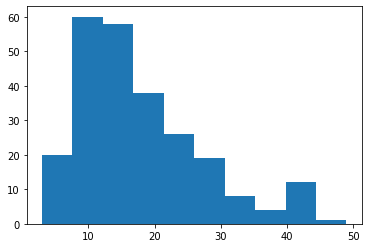

In [32]:
import matplotlib.pyplot as plt

plt.hist(nega_count)

(array([52., 82., 55., 42., 11.,  2.,  1.,  0.,  0.,  1.]),
 array([ 0. ,  3.6,  7.2, 10.8, 14.4, 18. , 21.6, 25.2, 28.8, 32.4, 36. ]),
 <BarContainer object of 10 artists>)

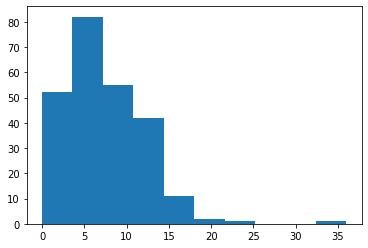

In [33]:
plt.hist(posi_count)

(array([ 3.,  6., 22., 44., 42., 54., 45., 20.,  6.,  4.]),
 array([-0.68326844, -0.59666733, -0.51006621, -0.42346509, -0.33686397,
        -0.25026286, -0.16366174, -0.07706062,  0.0095405 ,  0.09614162,
         0.18274273]),
 <BarContainer object of 10 artists>)

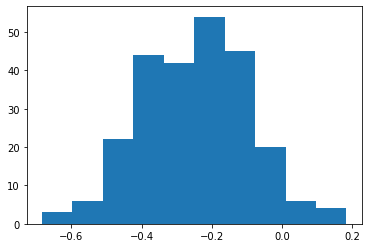

In [34]:
plt.hist(negaposi_score)

#VADER ON LYRICS

In [35]:
negaposi_score = []
nega_count = []
neu_count = []
posi_count = []

for l in tqdm.tqdm(lyrics):
    l = demoji.replace(string=l, repl='')
    l_list = re.findall('[A-Z][^A-Z]*', l)

    l_count = len(l_list)

    t_score = 0
    t_neg = 0
    t_neu = 0
    t_pos = 0

    for t in l_list:
        if len(t) > 500:
            t = t[:500]

        emotion = vader_analyzer.polarity_scores(t)
        score = emotion["compound"]
        t_score += score
        neg = emotion["neg"]
        neu = emotion['neu']
        pos = emotion['pos']
        if neg > neu:
            if neg > pos:
                t_neg += 1
            else:
                t_pos += 1
        else:
            if neu > pos:
                t_neu += 1
            else:
                t_pos += 1

    t_score = t_score / l_count
    negaposi_score.append(t_score)

    nega_count.append(t_neg)
    neu_count.append(t_neu)
    posi_count.append(t_pos)

df2['nltk_neg'] = nega_count
df2['nltk_neu'] = neu_count
df2['nltk_pos'] = posi_count
df2['nltk_score'] = negaposi_score

100%|██████████| 246/246 [00:01<00:00, 135.47it/s]


In [36]:
import collections

collections.Counter(nega_count)

Counter({0: 95, 2: 38, 1: 73, 3: 18, 6: 3, 4: 13, 5: 1, 9: 2, 7: 2, 10: 1})

In [37]:
collections.Counter(posi_count)

Counter({7: 3,
         4: 21,
         0: 61,
         2: 43,
         1: 53,
         5: 14,
         10: 3,
         13: 2,
         8: 3,
         3: 32,
         11: 2,
         14: 2,
         6: 5,
         9: 2})

In [38]:
print(sum(nega_count))
print(sum(neu_count))
print(sum(posi_count))

320
5308
588


In [39]:
df2

,artist,song,lyrics,bert_nega,bert_posi,bert_score,nltk_neg,nltk_neu,nltk_pos,nltk_score
0,Miley Cyrus,Flowers,"We were good, we were gold Kind of dream that ...",13,9,-0.144740,0,15,7,0.238127
1,SZA,Kill Bill,I'm still a fan even though I was salty Hate t...,15,7,-0.207048,2,16,4,0.054209
2,"Metro Boomin, The Weeknd, 21 Savage",Creepin' (with The Weeknd & 21 Savage),Oooh Just can't believe this man (Metro Boomin...,17,7,-0.239239,0,24,0,0.047654
3,"Metro Boomin, Future, Chris Brown",Superhero (Heroes & Villains) [with Future & C...,"(Metro, metro, metro, metro) Drankin' dope tur...",28,5,-0.427365,1,30,2,-0.013979
4,"Drake, 21 Savage",Rich Flex,"Go buy a zip of weed, hit the club Pay for 'bo...",18,10,-0.190593,1,25,2,-0.034607
...,...,...,...,...,...,...,...,...,...,...
241,"Grupo Marca Registrada, Grupo Frontera",Di Que Si,He was a boy who was a dreamer And he flew so ...,10,2,-0.383420,0,12,0,-0.024825
242,Mae Stephens,If We Ever Broke Up,"Throw it, throw it up Watch it all fall out Po...",17,16,-0.042716,0,33,0,0.002339
243,"$uicideboy$, Shakewell",Big Shot Cream Soda,"Rain, he wanted it comfortable I wanted that p...",10,10,-0.011087,2,13,5,0.135535
244,Chino Pacas,El Gordo Trae El Mando,P-P-P-P-P-PARTY That smile on your face Makes ...,22,4,-0.432062,1,19,6,0.001535


In [40]:
df2.to_csv("all_lyrics_negpos.csv", encoding='utf-8', index=False)